In [2]:
from tensorflow.keras.datasets import imdb
import numpy as np


2025-05-08 20:11:28.483290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746715288.580918   86163 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746715288.607571   86163 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746715288.806499   86163 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746715288.806536   86163 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746715288.806539   86163 computation_placer.cc:177] computation placer alr

In [3]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [18]:
train_data[1:3]

array([list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]),
       list([1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4

In [1]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

NameError: name 'train_data' is not defined

In [ ]:
x_train

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()

# Input layer — bigger + heavier dropout
model.add(Dense(512, input_shape=(10000,), activation="relu"))
model.add(Dropout(0.6))
model.add(BatchNormalization())

# Hidden Layer 1
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Hidden Layer 2
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Hidden Layer 3
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))

# Output
model.add(Dense(1, activation="sigmoid"))

# Compile
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Lower LR for better convergence

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       5,120,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,296,641 (20.21 MB)

 Trainable params: 5,294,849 (20.20 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau



history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=40,  # More patience, more depth
                    batch_size=128,  # Good compromise
                    callbacks=[early_stop, reduce_lr],
                    verbose=1)


Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - accuracy: 0.5785 - loss: 0.7526 - val_accuracy: 0.8672 - val_loss: 0.3840 - learning_rate: 5.0000e-04
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.8383 - loss: 0.3715 - val_accuracy: 0.8832 - val_loss: 0.2749 - learning_rate: 5.0000e-04
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9080 - loss: 0.2391 - val_accuracy: 0.8928 - val_loss: 0.2762 - learning_rate: 5.0000e-04
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9377 - loss: 0.1722 - val_accuracy: 0.8892 - val_loss: 0.2985 - learning_rate: 5.0000e-04
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9587 - loss: 0.1158 - val_accuracy: 0.8878 - val_loss: 0.3532 - learning_rate: 5.0000e-04
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9702 - loss: 0.0887 - val_accuracy: 0.8868 - val_loss: 0.3563 - learning_rate: 2.5000e-04
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/st

In [10]:
# 4. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f" Test Accuracy: {(test_acc*100):.4f}")
print(f" Test Loss: {test_loss:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8799 - loss: 0.2863

🧪 Test Accuracy: 88.1240
❌ Test Loss: 0.2852


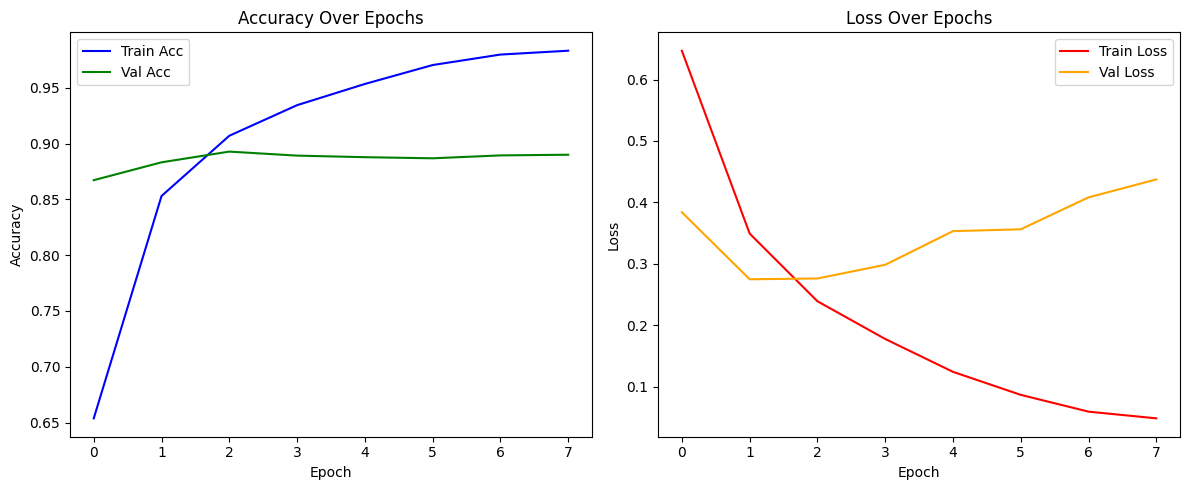

In [11]:
# 5. Graphs: Accuracy and Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='green')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


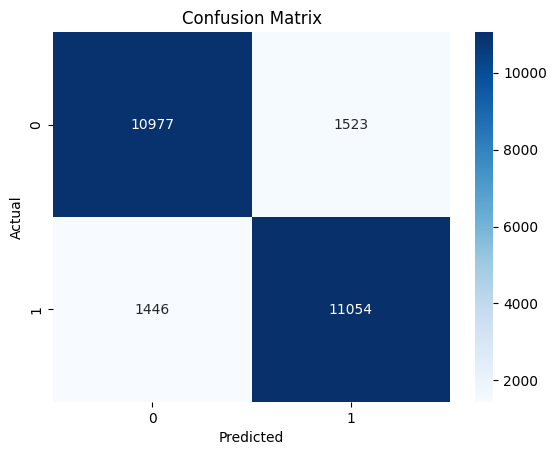


📊 Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     12500
         1.0       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [12]:
# 6. Confusion Matrix & Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_labels))

In [25]:
from keras.datasets import imdb
from keras.models import load_model
import numpy as np
import re

# Load IMDB word index
word_index = imdb.get_word_index()

# Function to convert sentence to sequence of word indices
def review_to_sequence(text, dimension=10000):
    text = re.sub(r"[^\w\s]", "", text.lower())
    words = text.split()
    sequence = [word_index.get(word, 2) for word in words if word_index.get(word, 2) < dimension]
    return sequence

# Function to convert sequence to BoW
def to_bow_vector(sequence, dimension=10000):
    vec = np.zeros(dimension)
    for i in sequence:
        if i < dimension:
            vec[i] = 1
    return vec


user_input = '''Sorry the movie is predictable and also not really well made as some parts are too long without giving anything more while others are too short and should be more investigated. The only positive thing of the whole 2 hours that the predictable and poorly directed and acted movie is the main actress that is the only reason I made till the end. The car scenes at the end of the movie is the only really scene of the whole thing.

# I don't understand how this movie won 5 oscars... probably the level is so low nowadays that you can win big also without this kind of film... This movie won best original screenplay instead of real pain....no idea what they smoked before voting.'''
#user_input = "loved it"
# Convert to sequence, then BoW
sequence = review_to_sequence(user_input)
bow_vector = to_bow_vector(sequence)

# Predict sentiment
prediction = model.predict(np.array([bow_vector]))[0][0]

# Output
print("\nYour review:", user_input)
print("Predicted Sentiment Score:", prediction)
print("Predicted Sentiment:", "Positive ✅" if prediction >= 0.5 else "Negative ❌")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Your review: Sorry the movie is predictable and also not really well made as some parts are too long without giving anything more while others are too short and should be more investigated. The only positive thing of the whole 2 hours that the predictable and poorly directed and acted movie is the main actress that is the only reason I made till the end. The car scenes at the end of the movie is the only really scene of the whole thing.

# I don't understand how this movie won 5 oscars... probably the level is so low nowadays that you can win big also without this kind of film... This movie won best original screenplay instead of real pain....no idea what they smoked before voting.
Predicted Sentiment Score: 0.26749545
Predicted Sentiment: Negative ❌
